In [1]:
from src.preprocessing import *
from src.metrics import *
from src.visualisation import *

In [2]:
networkx, multi_networkx = preprocess('../datasets/Railway.csv', DatasetType.RAILWAY)

Excluded 6022 stations


In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

# Graph Statistics

In [4]:
global_metrics = compute_global_metrics(networkx)
global_metrics

,Metrics,Directed,Undirected
0,Clustering Coefficient,0.377180,0.422829
1,Avg. Shortest Path Length,0.000000,8.786388
2,Diameter,0.000000,47.000000
3,Radius,0.000000,24.000000
4,Number of Nodes,2719.000000,2719.000000
5,Number of Edges,10778.000000,6175.000000
6,Density,0.001458,0.001671
7,Transitivity,0.292370,0.321659
8,Avg. Degree,7.927915,4.542111
9,Avg. Clustering,0.377180,0.422829


In [5]:
directed_node_metrics = compute_node_metrics(networkx)
directed_node_metrics

,Degree Centrality,Closeness Centrality,Betweeness Centrality,Eigenvector Centrality
692,0.008094,0.146138,0.025283,1.613618e-02
1351,0.005519,0.136173,0.015457,4.355226e-03
698,0.002208,0.119821,0.000544,6.230837e-04
944,0.003679,0.127892,0.000967,2.012309e-03
232,0.005151,0.120029,0.007658,6.061874e-04
...,...,...,...,...
2768,0.001472,0.086094,0.002926,1.448486e-07
2679,0.001472,0.079258,0.002195,1.301788e-08
2657,0.001472,0.073423,0.001464,1.169981e-09
2682,0.001472,0.068386,0.000732,1.051485e-10


In [6]:
undirected_node_metrics = compute_node_metrics(networkx.to_undirected())
undirected_node_metrics

,Degree Centrality,Closeness Centrality,Betweeness Centrality,Eigenvector Centrality
692,0.004415,0.155181,0.022524,8.662295e-03
1351,0.003679,0.143794,0.016451,2.183319e-03
698,0.001104,0.125740,0.000000,2.516111e-04
944,0.002208,0.134828,0.001943,8.853901e-04
232,0.002943,0.125985,0.007017,2.492824e-04
...,...,...,...,...
2768,0.000736,0.090018,0.002940,3.234174e-08
2679,0.000736,0.082601,0.002206,2.466000e-09
2657,0.000736,0.076310,0.001471,1.880379e-10
2682,0.000736,0.070905,0.000736,1.433865e-11


# VISUALISATION

In [7]:
plt_directed = plot_static_on_map(networkx, 'Railway Network Directed Graph', directed=True)

<IPython.core.display.Javascript object>

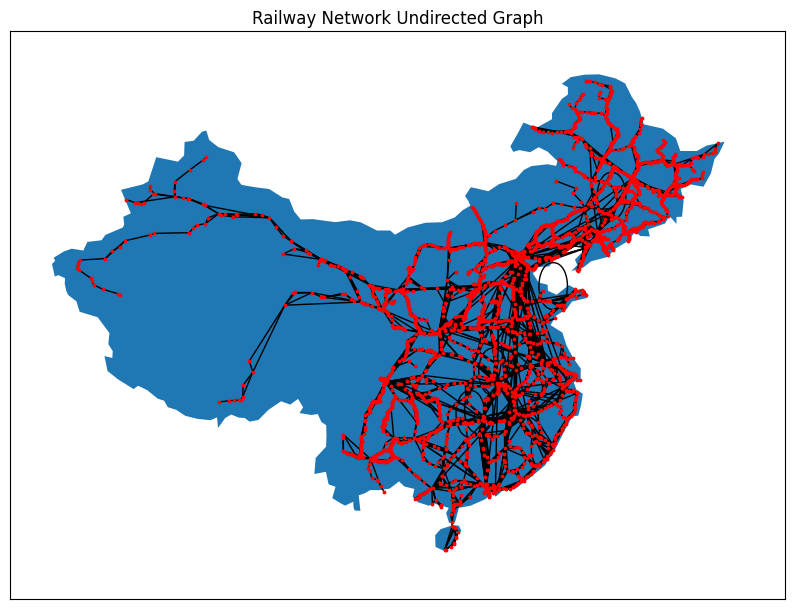

In [8]:
plt_undirected = plot_static_on_map(networkx, 'Railway Network Undirected Graph', directed=False)

# Spatial and Temporal Analysis

### Create frames of the graph
May take very long to create all of the frame images for 2 Days, one frame is created every 5 minute. You may change the range to create less frames and a shorter video.

In [3]:
temporal_graphs = create_temporal_subgraph(multi_networkx)

99.97%

In [10]:
slider, plt = plot_temporal_graphs(temporal_graphs)
display(slider)
plt.show()

### Create a video of the graph with cv2 (OpenCV)

In [9]:
# import cv2
# import os
#
# # Path to the folder containing the image frames
# frames_folder = 'frames/'
#
# # Get the list of frame filenames in the folder
# frame_filenames = os.listdir(frames_folder)
#
# # Sort the filenames in ascending order
# frame_filenames.sort(key=lambda x: int(x[:-4]))
#
# # Read the first frame to get its dimensions
# frame = cv2.imread(frames_folder + frame_filenames[0])
# height, width, layers = frame.shape
#
# # Create a VideoWriter object to write the video
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# video = cv2.VideoWriter('output.mp4', fourcc, 30, (width, height))
#
# # Loop through the frames and add them to the video
# i=0
# for filename in frame_filenames:
#     frame = cv2.imread(frames_folder + filename)
#     video.write(frame)
#     print(f"\r{i/2764*100:.2f}%", end="")
#     i+=1
#
# # Release the VideoWriter object and display a message
# video.release()
# print('\nVideo saved as output.mp4')

# SHORTEST PATH ANALYSIS

In [4]:
# def shortest_path(G, source, target):
#     return nx.shortest_path(G, source=source, target=target)

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [6]:
networkx

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [7]:
nx.shortest_path(networkx, source=1136, target=1095)

[1136, 1763, 389, 390, 2058, 802, 1070, 2065, 1100, 2144, 1095]

In [9]:
# Network Graph with the shortest path highlighted
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

china=world[world['name'] == 'China']
china.plot(figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, node_size=1, node_color='red')

shortest_path = nx.shortest_path(G, source=1095, target=1136)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_size=10, node_color='yellow')
nx.draw_networkx_edges(G, pos, edgelist=list(zip(shortest_path, shortest_path[1:])), edge_color='yellow', width=3)

plt.axis('on')
plt.title("Shortest Path between 1136 and 1095")
plt.show()


<IPython.core.display.Javascript object>

NetworkXNoPath: No path between 1095 and 1136.